### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv("../data/train_data2.csv")
df_test = pd.read_csv("../data/test_data2.csv")

In [5]:
df_train.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [6]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04,1,0,4.0,0,...,151.100000,12.419178,4,7,2004,3,0,2.0,16.580822,7.0
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01,2,1,3.0,0,...,130.900000,10.758904,1,3,2006,2,2,2.0,19.241096,7.0
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14,2,1,2.0,1,...,28.633333,2.353425,14,7,2014,5,0,2.0,26.646575,8.0
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30,0,0,4.0,0,...,195.700000,16.084932,30,10,2000,5,0,2.0,13.915068,6.0
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15,0,0,3.0,0,...,106.200000,8.728767,15,2,2008,5,1,1.0,15.271233,7.0


In [7]:
y = df_train["is_listened"].values

In [8]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [9]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2922
media_id: 452965
album_id: 151464
context_type: 74
release_date: 8901
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19918
artist_id: 67135
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [10]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [11]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "listen_type", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]
                #"media_decade"]


target = "is_listened"

In [12]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [13]:
te.fit(df_train)

In [14]:
te.transform(df_train)
te.transform(df_test)

In [15]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [16]:
rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [17]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [18]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,0.688147,2016-12-01 11:00:15,0.000000,41774,0.695604,2004-07-04,1,0,4.0,0.721113,...,151.100000,12.419178,4,7,2004,3,0,2.0,16.580822,2
1,0.567614,2016-11-30 20:25:35,1.000000,43941,0.688531,2006-03-01,2,1,3.0,0.721113,...,130.900000,10.758904,1,3,2006,2,2,2.0,19.241096,2
2,0.744035,2016-11-19 11:59:13,1.000000,48078,0.573605,2014-07-14,2,1,2.0,0.600282,...,28.633333,2.353425,14,7,2014,5,0,2.0,26.646575,1
3,0.663153,2016-11-26 07:21:38,0.000000,71521,0.688531,2000-10-30,0,0,4.0,0.721113,...,195.700000,16.084932,30,10,2000,5,0,2.0,13.915068,3
4,0.663153,2016-11-05 16:02:54,0.866667,71718,0.688531,2008-02-15,0,0,3.0,0.721113,...,106.200000,8.728767,15,2,2008,5,1,1.0,15.271233,2


In [19]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [20]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,media_duration,user_id,artist_id,user_age,...,user_age_group_2.0,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_2,ts_listen_DAY_OF_WEEK_3,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3
0,0.688147,2016-12-01 11:00:15,0.000000,41774,0.695604,2004-07-04,4.0,0.676991,56514,29,...,1,0,0,1,0,0,0,0,0,0
1,0.567614,2016-11-30 20:25:35,1.000000,43941,0.688531,2006-03-01,3.0,0.575000,11488,30,...,1,0,1,0,0,0,0,0,1,0
2,0.744035,2016-11-19 11:59:13,1.000000,48078,0.573605,2014-07-14,2.0,0.986755,4841,29,...,1,0,0,0,0,1,0,0,0,0
3,0.663153,2016-11-26 07:21:38,0.000000,71521,0.688531,2000-10-30,4.0,0.586977,1114,30,...,1,0,0,0,0,1,0,0,0,0
4,0.663153,2016-11-05 16:02:54,0.866667,71718,0.688531,2008-02-15,3.0,0.933868,3495,24,...,0,0,0,0,0,1,0,1,0,0


In [21]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [22]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'user_id', 'artist_id',
       'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'media_decade', 'platform_name_1', 'platform_name_2',
       'platform_family_1', 'platform_family_2',
       'listen_type_0.721112618548', 'user_gender_1', 'user_age_group_1.0',
       'user_age_group_2.0', 'ts_listen_DAY_OF_WEEK_1',
       'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3',
       'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5',
       'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1',
       'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3'], dtype=object)

In [23]:
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [24]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [25]:
features = [col for col in df_train.columns.values if col != target]
features

['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'listen_type_0.721112618548',
 'user_gender_1',
 'user_age_group_1.0',
 'user_age_group_2.0',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

### Feature Selection

In [28]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

28 selected variables from 31, 90.32%
['genre_id', 'media_id', 'context_type', 'media_duration', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age', 'media_decade', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'listen_type_0.721112618548', 'user_gender_1', 'user_age_group_1.0', 'user_age_group_2.0', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [29]:
feaures = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.727804736718
*********************************
Accuracy: 0.73
Precision: 0.805869773311
Recall: 0.79306176018
F1-Score: 0.799414468364
[[280282 197531]
 [213964 819987]]
Roc Area: 0.689827630074


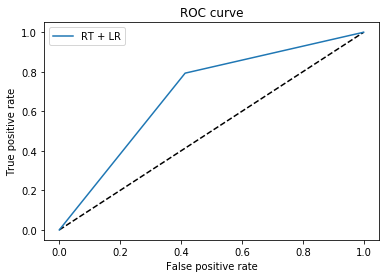

*********************************


0.68982763007384262

In [32]:
print(model.score(X_test, y_test))
complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, model.predict(X_test))

array([[280282, 197531],
       [213964, 819987]])

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.76827269335689963

*********************************
Accuracy: 0.77
Precision: 0.82687114382
Recall: 0.836286245673
F1-Score: 0.831552045392
[[296768 181045]
 [169272 864679]]
Roc Area: 0.72869139172


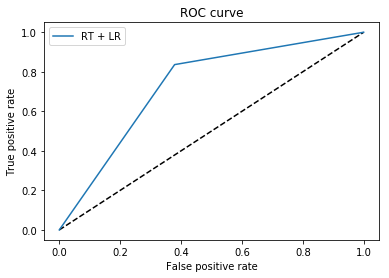

*********************************


0.72869139172000885

In [36]:
complete_report(y_test, model.predict(X_test))

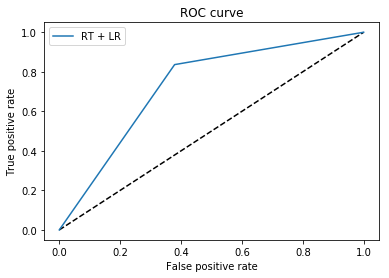

In [37]:
roc_curve_label(y_test, model.predict(X_test))

In [38]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [39]:
p = model.predict_proba(df_test[features])

In [40]:
p = p[:, 1]

In [41]:
build_kaggle_submission(p, "random_forest_new_feats")

In [47]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1035.558033
2.888214
6.4e-05


### GridSearch and XGBoost

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
model = Sequential()
model.add(Embedding(df_train["album_id"].max(), 64, input_length=10))
model.add(Dense(1, activation="relu"))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))
print(input_array)
model.compile('rmsprop', 'mse')
model.fit(input_array, np.array([1]))

output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array)

In [ ]:
df_train["album_id"].max()

In [ ]:
output_array